In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [57]:
# Создадим модель
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(2, activation='relu', input_shape=(2,), name='hidden_layer_1'),
  # tf.keras.layers.Dropout(0.2, name='dropout'),
  # tf.keras.layers.Dense(10, name='hidden_layer_2')
  tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 2)                 │          6 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_8 (Dense)                 │ (None, 1)                 │          3 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Скомпилируем
model.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mean_absolute_error']
)

In [60]:
X = np.array([
    [36, 1],    # 36 градусов, есть солнце 
    [37, 1],    # 37 градусов, есть солнце
    [36, 0],    # 36 градусов, нет солнца
    [37, 0],    # 37 градусов, нет солнца
])
 
Y = np.array([
    1, # открыты
    0, # закрыты
    0, # закрыты
    0, # закрыты
])
# Обучим
model.fit(
    X, # Набор входных данных
    Y, # Набор правильных ответов
    validation_split=0.7, # Этот параметр автоматически выделит часть обучающего набора на валидационные данные. В данном случа 20%
    epochs=100, # Процесс обучения завершится после 10 эпох
    batch_size = 8 # Набор данных будет разбит на пакеты (батчи) по 8 элементов набора в каждом. 
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step - loss: 1.0000 - mean_absolute_error: 1.0000 - val_loss: 9.9998e-07 - val_mean_absolute_error: 9.9999e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.9980 - mean_absolute_error: 0.9990 - val_loss: 3.9998e-06 - val_mean_absolute_error: 0.0020
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.9960 - mean_absolute_error: 0.9980 - val_loss: 8.9993e-06 - val_mean_absolute_error: 0.0030
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.9940 - mean_absolute_error: 0.9970 - val_loss: 1.5998e-05 - val_mean_absolute_error: 0.0040
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.9920 - mean_absolute_error: 0.9960 - val_loss: 2.4995e-05 - val_mean_absolute_error: 0.0050
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.9900 - mean_absolute_error: 0.9950 - val_loss: 3.5991e-05 - val_mean_absolute_error: 0.0060
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.9880 - mean_absolute_er

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


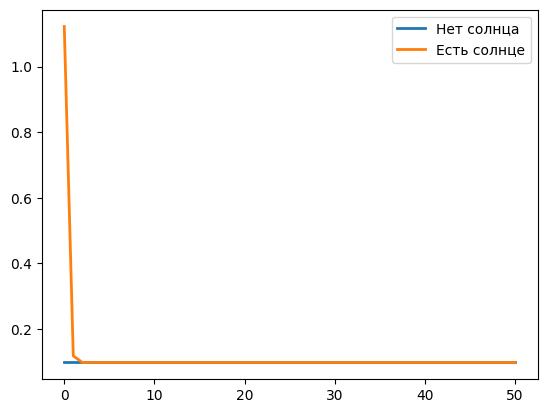

In [61]:
sun = 0
X_test = []
for C in range(0, 51):
  X_test.append([C, sun])
X_test = np.array(X_test)
feedforwardsNoSun = model.predict(X_test)
sun = 1
X_test = []
for C in range(0, 51):
  X_test.append([C, sun])
X_test = np.array(X_test)
feedforwardsSun = model.predict(X_test)

fig, ax = plt.subplots()

ax.plot([C for C in range(0, 51)], feedforwardsNoSun, linewidth=2.0, label='Нет солнца')

ax.plot([C for C in range(0, 51)], feedforwardsSun, linewidth=2.0, label='Есть солнце')
ax.legend()
plt.show()

проверим на большей выборке

In [62]:
# Создадим модель
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(2, activation='relu', input_shape=(2,), name='hidden_layer_1'),
  # tf.keras.layers.Dropout(0.2, name='dropout'),
  # tf.keras.layers.Dense(10, name='hidden_layer_2')
  tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 2)                 │          6 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_9 (Dense)                 │ (None, 1)                 │          3 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Скомпилируем
model.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mean_absolute_error']
)

In [70]:
X = np.array([
    [36, 1],    # 36 градусов, есть солнце 
    [37, 1],    # 37 градусов, есть солнце
    [36, 0],    # 36 градусов, нет солнца
    [37, 0],    # 37 градусов, нет солнца
])
 
Y = np.array([
    1, # открыты
    0, # закрыты
    0, # закрыты
    0, # закрыты
])
# Обучим
model.fit(
    X, # Набор входных данных
    Y, # Набор правильных ответов
    validation_split=0.7, # Этот параметр автоматически выделит часть обучающего набора на валидационные данные. В данном случа 20%
    epochs=100, # Процесс обучения завершится после 10 эпох
    batch_size = 8 # Набор данных будет разбит на пакеты (батчи) по 8 элементов набора в каждом. 
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - loss: 0.1230 - mean_absolute_error: 0.3507 - val_loss: 2.9587 - val_mean_absolute_error: 1.7060
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1180 - mean_absolute_error: 0.3435 - val_loss: 2.9173 - val_mean_absolute_error: 1.6938
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1099 - mean_absolute_error: 0.3314 - val_loss: 2.8619 - val_mean_absolute_error: 1.6773
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0994 - mean_absolute_error: 0.3152 - val_loss: 2.7952 - val_mean_absolute_error: 1.6573
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0873 - mean_absolute_error: 0.2955 - val_loss: 2.7198 - val_mean_absolute_error: 1.6343
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0744 - mean_absolute_error: 0.2728 - val_loss: 2.6379 - val_mean_absolute_error: 1.6091
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0614 - mean_absolute_error: 0.2479 - val_loss: 2.55

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


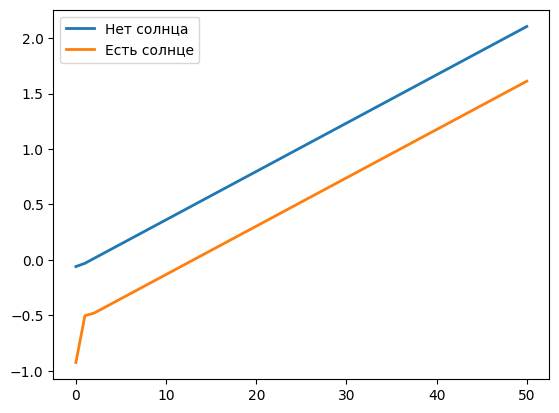

In [71]:
sun = 0
X_test = []
for C in range(0, 51):
  X_test.append([C, sun])
X_test = np.array(X_test)
feedforwardsNoSun = model.predict(X_test)
sun = 1
X_test = []
for C in range(0, 51):
  X_test.append([C, sun])
X_test = np.array(X_test)
feedforwardsSun = model.predict(X_test)

fig, ax = plt.subplots()

ax.plot([C for C in range(0, 51)], feedforwardsNoSun, linewidth=2.0, label='Нет солнца')

ax.plot([C for C in range(0, 51)], feedforwardsSun, linewidth=2.0, label='Есть солнце')
ax.legend()
plt.show()

In [72]:
# Создадим модель
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(6, activation='relu', input_shape=(2,), name='hidden_layer_1'),
  # tf.keras.layers.Dropout(0.2, name='dropout'),
  # tf.keras.layers.Dense(10, name='hidden_layer_2')
  tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 6)                 │         18 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_11 (Dense)                │ (None, 1)                 │          7 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Скомпилируем
model.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mean_absolute_error']
)

In [74]:
dataset = [[[i, 1], 1 if i <= 36 else 0] for i in range(26, 47)]
dataset += [[[i, 0], 0] for i in range(26, 47)]
X = np.array([i[0] for i in dataset])
Y = np.array([i[1] for i in dataset])
# Обучим
model.fit(
    X, # Набор входных данных
    Y, # Набор правильных ответов
    validation_split=0.8, # Этот параметр автоматически выделит часть обучающего набора на валидационные данные. В данном случа 20%
    epochs=100, # Процесс обучения завершится после 10 эпох
    batch_size = 8 # Набор данных будет разбит на пакеты (батчи) по 8 элементов набора в каждом. 
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 67.6821 - mean_absolute_error: 8.2130 - val_loss: 72.0511 - val_mean_absolute_error: 8.3718
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 65.9409 - mean_absolute_error: 8.1067 - val_loss: 69.7445 - val_mean_absolute_error: 8.2361
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 64.2240 - mean_absolute_error: 8.0006 - val_loss: 67.4784 - val_mean_absolute_error: 8.1005
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 62.5318 - mean_absolute_error: 7.8946 - val_loss: 65.2531 - val_mean_absolute_error: 7.9651
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 60.8647 - mean_absolute_error: 7.7887 - val_loss: 63.0691 - val_mean_absolute_error: 7.8299
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 59.2230 - mean_absolute_error: 7.6831 - val_loss: 60.9268 - val_mean_absolute_error: 7.6950
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 57.6070 - mean_absolute_error: 7.5776 - val_

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


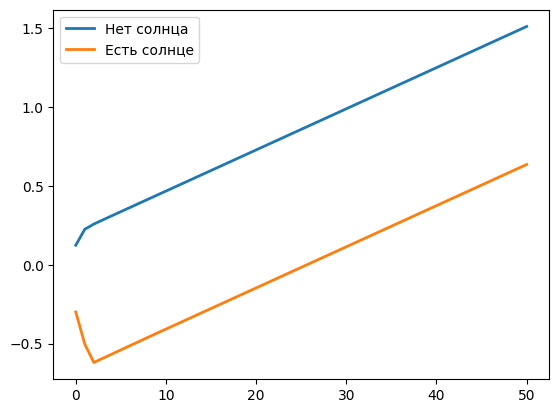

In [75]:
sun = 0
X_test = []
for C in range(0, 51):
  X_test.append([C, sun])
X_test = np.array(X_test)
feedforwardsNoSun = model.predict(X_test)
sun = 1
X_test = []
for C in range(0, 51):
  X_test.append([C, sun])
X_test = np.array(X_test)
feedforwardsSun = model.predict(X_test)

fig, ax = plt.subplots()

ax.plot([C for C in range(0, 51)], feedforwardsNoSun, linewidth=2.0, label='Нет солнца')

ax.plot([C for C in range(0, 51)], feedforwardsSun, linewidth=2.0, label='Есть солнце')
ax.legend()
plt.show()

In [76]:
# Создадим модель
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(6, activation='relu', input_shape=(2,), name='hidden_layer_1'),
  # tf.keras.layers.Dropout(0.2, name='dropout'),
  # tf.keras.layers.Dense(10, name='hidden_layer_2')
  tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 6)                 │         18 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_12 (Dense)                │ (None, 1)                 │          7 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [77]:
# Скомпилируем
model.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mean_absolute_error']
)

In [78]:
dataset = [[[i, 1], 1 if i <= 36 else 0] for i in range(26, 47)]
dataset += [[[i, 0], 0] for i in range(26, 47)]
X = np.array([i[0] for i in dataset])
Y = np.array([i[1] for i in dataset])
# Обучим
model.fit(
    X, # Набор входных данных
    Y, # Набор правильных ответов
    validation_split=0.8, # Этот параметр автоматически выделит часть обучающего набора на валидационные данные. В данном случа 20%
    epochs=100, # Процесс обучения завершится после 10 эпох
    batch_size = 8 # Набор данных будет разбит на пакеты (батчи) по 8 элементов набора в каждом. 
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step - loss: 6.2939 - mean_absolute_error: 2.5065 - val_loss: 3.3503 - val_mean_absolute_error: 1.7937
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5.8058 - mean_absolute_error: 2.4075 - val_loss: 2.8981 - val_mean_absolute_error: 1.6653
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 5.3380 - mean_absolute_error: 2.3086 - val_loss: 2.4805 - val_mean_absolute_error: 1.5373
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.8908 - mean_absolute_error: 2.2099 - val_loss: 2.0976 - val_mean_absolute_error: 1.4096
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 4.4645 - mean_absolute_error: 2.1115 - val_loss: 1.7495 - val_mean_absolute_error: 1.2824
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 4.0594 - mean_absolute_error: 2.0136 - val_loss: 1.4359 - val_mean_absolute_error: 1.1560
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3.6755 - mean_absolute_error: 1.9161 - val_loss: 1.15

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


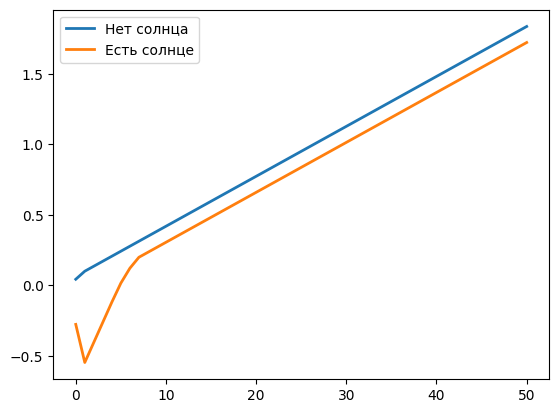

In [79]:
sun = 0
X_test = []
for C in range(0, 51):
  X_test.append([C, sun])
X_test = np.array(X_test)
feedforwardsNoSun = model.predict(X_test)
sun = 1
X_test = []
for C in range(0, 51):
  X_test.append([C, sun])
X_test = np.array(X_test)
feedforwardsSun = model.predict(X_test)

fig, ax = plt.subplots()

ax.plot([C for C in range(0, 51)], feedforwardsNoSun, linewidth=2.0, label='Нет солнца')

ax.plot([C for C in range(0, 51)], feedforwardsSun, linewidth=2.0, label='Есть солнце')
ax.legend()
plt.show()